## Network Descriptions over time

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter,ScalarFormatter
from matplotlib.lines import Line2D
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter
from matplotlib.lines import Line2D

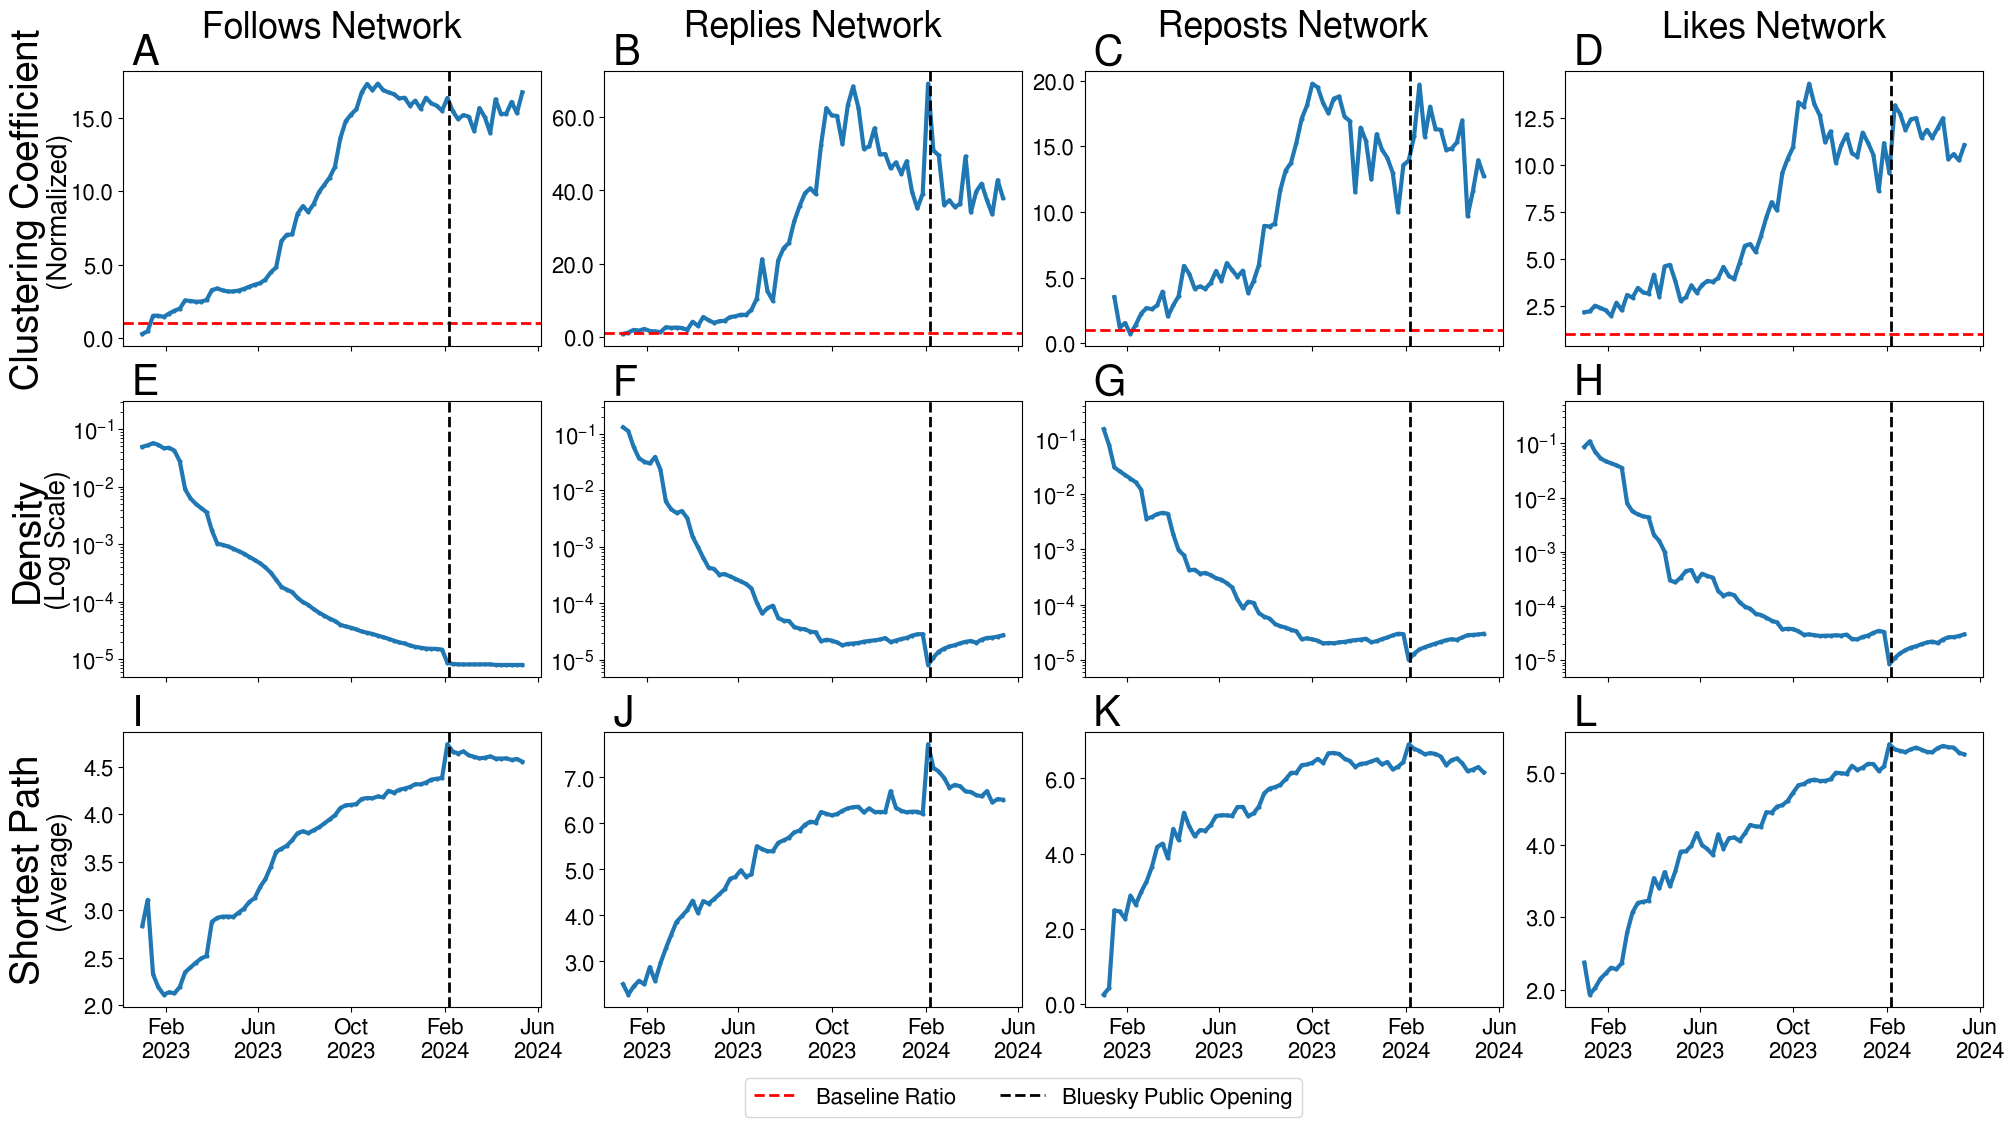

In [3]:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Helvetica', 'FreeSans']

# Create the figure and axes grid for the last 2 rows
fig1, axes2 = plt.subplots(3, 4, figsize=(24, 12), sharex=True)
network_types = ['following', 'interactions', 'reposts', 'likes']
titles = ['Follows', 'Replies', 'Reposts', 'Likes']

# Define a formatter that does not use scientific notation and limits to one decimal place
def custom_formatter(x, pos):
    return f'{x:.1f}'

for idx, network_type in enumerate(network_types):
    cc_ana = pd.read_csv(f"../../Data/Topology/CC_Analysis_{network_type}.txt", header = None)
    cc_ana.columns = ["from","to","true_cc","rand_cc","ratio","true_density","rand_density","ratio_dens","true_shortest_path", "rand_shortest_path"]
    cc_ana["from"] = pd.to_datetime(cc_ana["from"], utc = True)
    cc_ana = cc_ana[cc_ana["from"] < pd.to_datetime("2024-05-18", utc = True)]
    ratio = np.array(cc_ana["true_cc"] / cc_ana["rand_cc"])
    densities = np.array(cc_ana["true_density"])
    shortest_path = np.array(cc_ana["true_shortest_path"])
    dates = np.array(cc_ana["from"])

    axes2[0, idx].plot(dates, ratio, marker='o', markersize=2, lw=3, label='Normalized Clustering Coefficient')
    axes2[1, idx].plot(dates, densities, marker='o', markersize=2, lw=3, label='Density')
    axes2[2, idx].plot(dates, shortest_path, marker='o', markersize=2, lw=3, label='Avg. Shortest Path')

    # Title configuration
    axes2[0, idx].set_title(f'{titles[idx]} Network', fontsize=26, pad=25)

# Adding horizontal and vertical lines
for axs in axes2[0]:   
    axs.axhline(1, color='red', linestyle='--', label='Baseline Ratio' if idx == 0 else "", lw=2)

# Formatting section for the last 2 rows
for ax_row in axes2:
    for ax in ax_row:
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
        ax.yaxis.set_major_formatter(FuncFormatter(custom_formatter))
        ax.axvline(pd.to_datetime("2024-02-06"), color='k', linestyle='--', label='Bluesky Public Opening' if idx == 0 else "", lw=2)
        ax.grid(False)
        
for ax in axes2[1]:
    ax.set_yscale('log', base=10)

# Font size of all the ticks (x, y, xticks, and yticks) = 12
for ax in axes2.flat:
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.tick_params(axis='both', which='minor', labelsize=16)

labels = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X"]
for ax in axes2[1]:
    min_val = min([ax.get_ylim()[0] for ax in axes2[1]])
    max_val = max([ax.get_ylim()[1] for ax in axes2[1]])
    ax.set_ylim(min_val, max_val * 1.25)

for idx, ax in enumerate(axes2.flat):
    ax.text(0.02, 1.025, labels[idx], transform=ax.transAxes, fontsize=30)

# Label and legend configuration for the last 2 rows
axes2[0, 0].text(-0.185, 0.5, 'Clustering Coefficient', fontsize=28, rotation='vertical', va='center', ha='right', transform=axes2[0, 0].transAxes)
axes2[1, 0].text(-0.185, 0.5, 'Density', fontsize=28, rotation='vertical', va='center', ha='right', transform=axes2[1, 0].transAxes)
axes2[0, 0].text(-0.125, 0.5, '(Normalized)', fontsize=20, rotation='vertical', va='center', ha='right', transform=axes2[0, 0].transAxes)
axes2[1, 0].text(-0.125, 0.5, '(Log Scale)', fontsize=20, rotation='vertical', va='center', ha='right', transform=axes2[1, 0].transAxes)
axes2[2, 0].text(-0.185, 0.5, 'Shortest Path', fontsize=28, rotation='vertical', va='center', ha='right', transform=axes2[2, 0].transAxes)
axes2[2, 0].text(-0.125, 0.5, '(Average)', fontsize=20, rotation='vertical', va='center', ha='right', transform=axes2[2, 0].transAxes)

#fig1.text(0.5, 0.02, 'Date', ha='center', va='center', fontsize=20)

custom_lines = [Line2D([0], [0], color='red', linestyle='--', lw=2, label='Baseline Ratio'),
                Line2D([0], [0], color='black', linestyle='--', lw=2, label='Bluesky Public Opening')]

fig1.legend(handles=custom_lines, loc='upper center', bbox_to_anchor=(0.5, 0.05), ncol=2, fontsize=16)

# Adjust ax layout
plt.subplots_adjust(hspace=0.2, wspace=0.15, bottom=0.1)

plt.savefig('../../Plots/NetworkAnalysis_LastTwoRows.png', dpi=300, bbox_inches='tight')
plt.savefig('../../Plots/NetworkAnalysis_LastTwoRows.pdf', dpi=300, bbox_inches='tight')

plt.show()

0it [00:00, ?it/s]

4it [10:52, 163.09s/it]


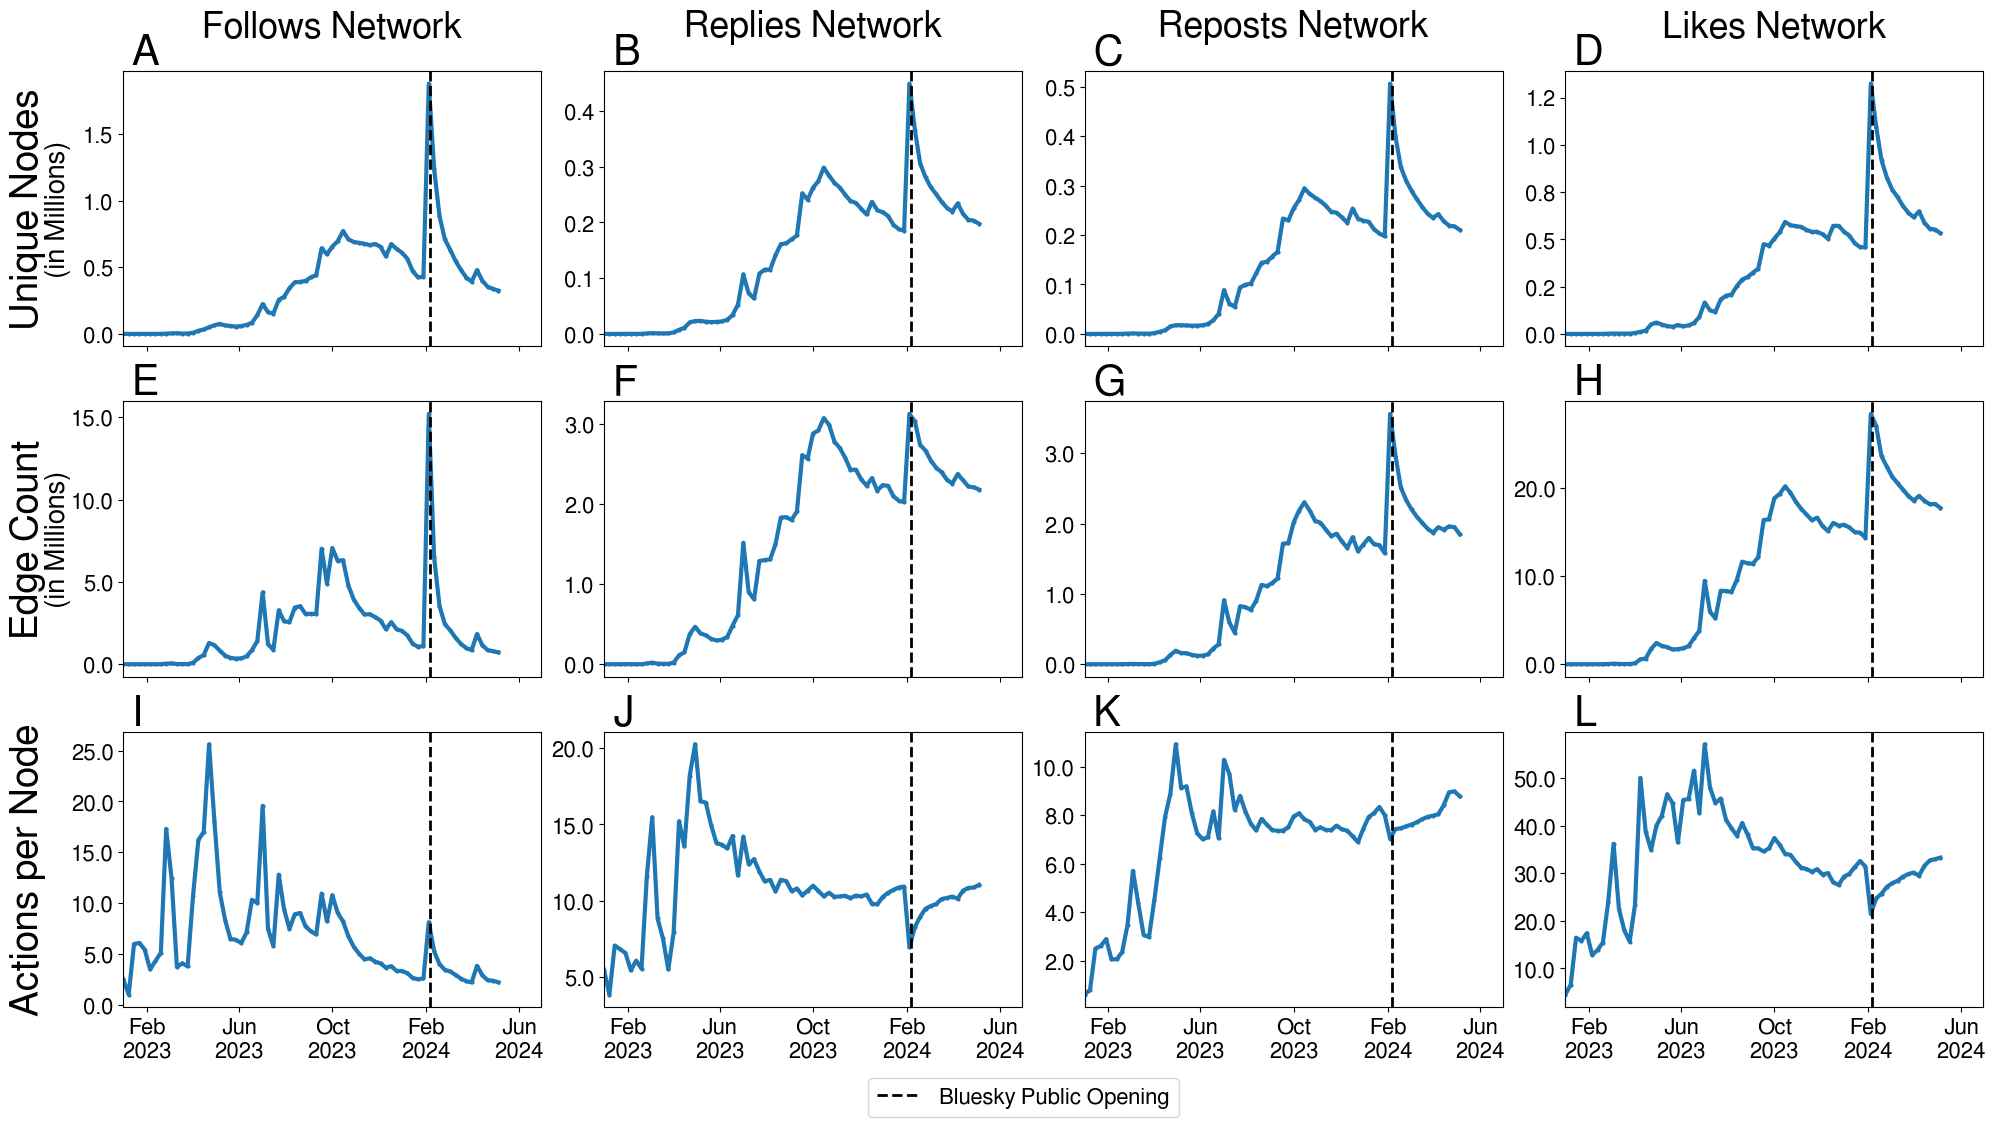

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
from matplotlib.lines import Line2D
from tqdm import tqdm

# Set font Arial as default font
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Helvetica', 'FreeSans']

# Create the figure and axes grid for the first 3 rows
fig1, axes1 = plt.subplots(3, 4, figsize=(24, 12), sharex=True)
network_types = ['following', 'interactions', 'reposts', 'likes']
titles = ['Follows', 'Replies', 'Reposts', 'Likes']

# Define a formatter that does not use scientific notation and limits to one decimal place
def custom_formatter(x, pos):
    return f'{x:.1f}'

# Loop through each network type to load data and plot for the first 3 metrics
for idx, network in tqdm(enumerate(network_types)):
    with np.load(f'/home/b/dquell/compute-AGabo/bluesky/Descriptive/Data/{network}_week_ind_edges.npz', allow_pickle=True) as data:
        week_ind = data['week_ind'][:-2]
        edges = data['edges'][:-2]

    number_of_nodes_per_week = [len(set(edges[week_ind[i]:week_ind[i+1]].reshape(-1, ))) for i in range(len(week_ind)-1)][:-1]
    number_of_nodes_per_week = np.array(number_of_nodes_per_week) / 1e6
    week_ind_diff = np.diff(week_ind)[:-1] / 1e6  # Convert to millions
    actions_per_unique_node = week_ind_diff / number_of_nodes_per_week

    dates = [pd.to_datetime("2023-01-01") + pd.DateOffset(days=i*7) for i in range(len(number_of_nodes_per_week))]
    
    # Filter data up to May 6, 2024
    cutoff_date = pd.to_datetime("2024-05-27")
    mask = np.array(dates) <= cutoff_date
    dates = np.array(dates)[mask]
    number_of_nodes_per_week = number_of_nodes_per_week[mask]
    week_ind_diff = week_ind_diff[mask]
    actions_per_unique_node = actions_per_unique_node[mask]
    
    # Plotting logic for the first 3 rows
    axes1[0, idx].plot(dates, number_of_nodes_per_week, marker='o', markersize=2, lw=3)
    axes1[1, idx].plot(dates, week_ind_diff, marker='o', markersize=2, lw=3)
    axes1[2, idx].plot(dates, actions_per_unique_node, marker='o', markersize=2, lw=3)

    # Title configuration
    axes1[0, idx].set_title(f'{titles[idx]} Network', fontsize=26, pad=25)

# Formatting section for the first 3 rows
for ax_row in axes1:
    for ax in ax_row:
        ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(2, 6, 10)))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
        ax.yaxis.set_major_formatter(FuncFormatter(custom_formatter))
        ax.axvline(pd.to_datetime("2024-02-06"), color='k', linestyle='--', label='Bluesky Public Opening', lw=2)
        ax.grid(False)
        ax.set_xlim(pd.to_datetime("2023-01-01"), pd.to_datetime("2024-06-30"))

# Font size of all the ticks (x, y, xticks, and yticks) = 16
for ax in axes1.flat:
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.tick_params(axis='both', which='minor', labelsize=16)

labels = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L"]
for idx, ax in enumerate(axes1.flat):
    ax.text(0.02, 1.025, labels[idx], transform=ax.transAxes, fontsize=30)

# Label and legend configuration for the first 3 rows
axes1[0, 0].text(-0.185, 0.5, 'Unique Nodes', fontsize=28, rotation='vertical', va='center', ha='right', transform=axes1[0, 0].transAxes)
axes1[0, 0].text(-0.125, 0.5, '(in Millions)', fontsize=20, rotation='vertical', va='center', ha='right', transform=axes1[0, 0].transAxes)
axes1[1, 0].text(-0.185, 0.5, 'Edge Count', fontsize=28, rotation='vertical', va='center', ha='right', transform=axes1[1, 0].transAxes)
axes1[1, 0].text(-0.125, 0.5, '(in Millions)', fontsize=20, rotation='vertical', va='center', ha='right', transform=axes1[1, 0].transAxes)
axes1[2, 0].text(-0.185, 0.5, 'Actions per Node', fontsize=28, rotation='vertical', va='center', ha='right', transform=axes1[2, 0].transAxes)

custom_lines = [Line2D([0], [0], color='black', linestyle='--', lw=2, label='Bluesky Public Opening')]
fig1.legend(handles=custom_lines, loc='upper center', bbox_to_anchor=(0.5, 0.05), ncol=2, fontsize=16)

# Adjust ax layout
plt.subplots_adjust(hspace=0.2, wspace=0.15, bottom=0.1)

plt.savefig('../../Plots/NetworkAnalysis_FirstThreeRowss.png', dpi=300, bbox_inches='tight')
plt.savefig('../../Plots/NetworkAnalysis_FirstThreeRowss.pdf', dpi=300, bbox_inches='tight')

plt.show()